# TF-IDF Scripts

### Import Libraries

In [29]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


### Custom Functions and File Imports

In [30]:
def removeStopWords(text):
    pass
    

In [31]:
os.chdir("D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\Batch 004") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

aless_enri.csv
faye_posadas.csv
kate_ermitano.csv
['aless_enri.csv', 'faye_posadas.csv', 'kate_ermitano.csv']


In [32]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3.fillna(0)

Unnamed: 0                                            message  \
0           9000  👀YUP ! FACTS! PROOF! EVIDENCE! TRUTH! IS THE L...   
1           9001                                Pray USA, 🙏🙏🙏❤️❤️❤️   
2           9002                TRUMP 2020❤️❤️❤️❤️RED WAVE INCOMING   
3           9003  All you people crying about covid dont even kn...   
4           9004     GERMANY LOVES TRUMP! WE NEED SOMEONE LIKE HIM!   
...          ...                                                ...   
2995       11995                             Coma-la Harris is Evil   
2996       11996                      :awesome: :awesome: :awesome:   
2997       11997  BIDEN WILL DEFUND THE POLICE AND RADICAL LEFT ...   
2998       11998  :thanksdoc::thanksdoc::thanksdoc:THANK YOU, ME...   
2999       11999                    Chicken nuggets are really good   

                   author            time_text  Direct Harassment  \
0     username@ISRKEWKELW  1900-01-02 02:15:00                0.0   
1     username@BnnBe eeBn  1900-01-02 02:15:00                0.0   
2     username@iizzilln i  1900-01-02 02:15:00                0.0   
3      username@JxeoonFio  1900-01-02 02:16:00                0.0   
4     username@rraorroaag  1900-01-02 02:16:00                0.0   
...                   ...                  ...                ...   
2995  username@oR ss oBBs             01:03:36                1.0   
2996  username@riiñrJoroo             01:03:36                0.0   
2997  username@dsenesea t             01:03:36                0.0   
2998  username@NSaimmmoaN             01:03:36                0.0   
2999   username@irhihrhrh             01:03:36                0.0   

      Hate Speech  Sexual Harassment  Trolling  Others  Toxic  
0             0.0                0.0       0.0     0.0    0.0  
1             0.0                0.0       0.0     0.0    0.0  
2             0.0                0.0       0.0     0.0    0.0  
3             1.0                0.0       0.0     1.0    1.0  
4             0.0                0.0       0.0     0.0    0.0  
...           ...                ...       ...     ...    ...  
2995          0.0                0.0       1.0     0.0    0.0  
2996          0.0                0.0       0.0     0.0    0.0  
2997          0.0                0.0       1.0     0.0    0.0  
2998          0.0                0.0       0.0     0.0    0.0  
2999          0.0                0.0       0.0     0.0    0.0  

[3000 rows x 10 columns]

### Combine Documents Per Label

In [33]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

Unnamed: 0                                            message  \
48          9048                                  Biden is a corpse   
53          9053                          BEIJING BIDEN FOR PRISON!   
62          9062                                MEDIA MAFIA 4 BIDEN   
81          9081  Trump is the best thing that could happen to g...   
87          9087                                        Biden sucks   
...          ...                                                ...   
2692       11692  the so called news reporters are not real prof...   
2767       11767                         LADY GAGA IS REALLY A MALE   
2843       11843      Where is Hunter? Why isn’t he helping Sleepy?   
2895       11895   SANTA'S COMING TO TOWN YOU FILTHY SONE A BEEATCH   
2897       11897                         SUCK IT UP, TRAITOR TROLLS   

      Direct Harassment  
48                  1.0  
53                  1.0  
62                  1.0  
81                  1.0  
87                  1.0  
...                 ...  
2692                1.0  
2767                1.0  
2843                1.0  
2895                1.0  
2897                1.0  

[108 rows x 3 columns]

In [34]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

Unnamed: 0                                            message  \
33          9033                                       CHINA BUYDEN   
53          9053                          BEIJING BIDEN FOR PRISON!   
127         9127                   please usa vote trump anti china   
147         9147  🧱******BIDEN WILL RISE*******🧱 ***************...   
163         9163  people who vote for Biden are simply uneducate...   
...          ...                                                ...   
2685       11685  DEMS ONLY FAKE "CARING" TO BAIT PEOPLE & USE T...   
2780       11780             🧂BIDEN SUPPORTERS ONLY WANT FREE SHIT🧂   
2831       11831      PA will GO TRUMP/GOP. Our Dem GOV is a moron.   
2916       11916                             DEMOCRATS HATE AMERICA   
2926       11926  2 MORE VOTES FOR TRUMP SUBMITTED, WHICH MEANS ...   

      Hate Speech  
33            1.0  
53            1.0  
127           1.0  
147           1.0  
163           1.0  
...           ...  
2685          1.0  
2780          1.0  
2831          1.0  
2916          1.0  
2926          1.0  

[87 rows x 3 columns]

In [35]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

Unnamed: 0                                            message  \
24          9024  Lady GaGa is Ugly GaGa another weak minded per...   
126         9126           THE SPIRIT IS STRONG WITH THE GREY HAIR.   
552         9552                       HARRIS needs her broom stick   
943         9943                                 T-REX MOUTH KAMALA   
1086       10086                                Keep America Free!!   
1260       10260                     GRAB PENCE BY THE P**** !!! 💥💥   
1664       10664  🦶HUNTERS FOOTJOBS MATTER 🍌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌🛌...   
2171       11171                         🦶HUNTERS FOOTJOBS MATTER 🍌   

      Sexual Harassment  
24                  1.0  
126                 1.0  
552                 1.0  
943                 1.0  
1086                1.0  
1260                1.0  
1664                1.0  
2171                1.0

In [36]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

Unnamed: 0                                            message  Trolling
45          9045                                    ABC = FAKE NEWS       1.0
153         9153                               TAX HIKERS FOR BIDEN       1.0
182         9182  Kamala just admitted she is a communist. now t...       1.0
227         9227             BIDEN IS MARXIST, TRUMP A MAN OF PEACE       1.0
384         9384                     😠BIDEN 💰LAUNDERING CORRUPTION👹       1.0
...          ...                                                ...       ...
2735       11735                  CHINA JOE FOR FIRING SQUAD 2020!!       1.0
2789       11789                              Biden...Lock him down       1.0
2841       11841  USA you are the last stand against communism &...       1.0
2873       11873                             CHINESE BOTS FOR BIDEN       1.0
2952       11952                                😠BIDEN CORRUPTION 😠       1.0

[97 rows x 3 columns]

In [37]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

Unnamed: 0                                            message  Others
483         9483                                      ARREST BIDENS     1.0
524         9524  Love Mike Dem's go away. Biden should be in ja...     1.0
1044       10044                                    lol LOCK HER UP     1.0
1114       10114  starting go fund me page to send all media rep...     1.0
1175       10175                                 Deport Kamala!!!!!     1.0
1260       10260                     GRAB PENCE BY THE P**** !!! 💥💥     1.0
1425       10425  it's going to be great television..Trump is go...     1.0
1549       10549                                    LOCK UP WHITMER     1.0
1791       10791                                        FRACK BIDEN     1.0
2000       11000             BEIJING BIDEN FOR PRISON 2020 TO LIFE!     1.0
2037       11037                            💩 BIDEN 4 T‎ERRORISM! 💩     1.0
2201       11201           BEIJING BIDEN FOR PRISON 2020 TO LIFE!!!     1.0
2282       11282  ALL ON HERE SHOULD TERROEIZE THE DEMOCRATS ON ...     1.0
2401       11401  WHOEVER VOTES BIDEN NEEDS TO GO TO A JAIL CELL...     1.0
2552       11552  IF BIDEN MENTIONED GOD, HE WOULD BURST INTO FL...     1.0
2811       11811                              PUT RIOTERS IN PRISON     1.0

In [38]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

Unnamed: 0                                            message  Toxic
17          9017                                      Biden to JAIL    1.0
18          9018                        Biden and Harris for prison    1.0
107         9107                                   OBAMA FOR PRISON    1.0
115         9115                             JOHN PETERS IS USELESS    1.0
131         9131                                          MSM SUCKS    1.0
...          ...                                                ...    ...
2940       11940                   No MO SLO, NO MOJO Joe-KE LIEDEM    1.0
2944       11944                                KAMALA IS DANGEROUS    1.0
2952       11952                                😠BIDEN CORRUPTION 😠    1.0
2993       11993  NO MORE JOE..PERIOD DEMENTIA JOE GO GO GO!!! A...    1.0
2995       11995                             Coma-la Harris is Evil    1.0

[166 rows x 3 columns]

### NLP Text Processing Stuff


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [46]:
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(dHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

<AxesSubplot:>

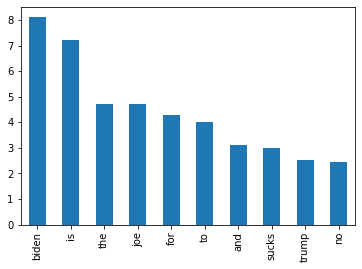

In [50]:
vals = vals[0:10]
vals.plot.bar()